# КММФЯ, задание 5
## Методические указания по выполнению работы

Перед тем как перейти к моделированию фононного спектра для трехмерного образца, будет полезно изобразить кубическую решетку с пронумерованными узлами по типу индексов марицы и составить выражения для всех связей. Затем, по принципу изложенному в предыдущих работах составляем *динамическую матрицу*:

$$U_{lmn}=V_{mln}e^{2i\pi((m+l+n)ak-t\omega)}$$

$$p(6U_{lmn}-U_{l-1,m,n}-U_{l+1,m,n}-U_{l,m-1,n}-U_{l,m+1,n}-U_{l,m,n-1}-U_{l,m,n+1})=pU_{lmn}(6-3e^{-2i\pi ka}-3e^{2i\pi ka})$$

$$D=\begin{pmatrix} a_{11}& 0 & 0\\ 0 & a_{22} & 0\\0 & 0 & a_{33}\end{pmatrix}$$

$$a_{11}=a_{22}=a_{33}=\frac{p}{m}\left(6-e^{2i\pi k(a_x,a_y,a_z)}-e^{2i\pi k(-a_x,-a_y,-a_z)}-e^{2i\pi k(a_x,-a_y,-a_z)}-e^{2i\pi k(-a_x,a_y,a_z)}-e^{2i\pi k(a_x,-a_y,a_z)}-e^{2i\pi k(-a_x,a_y,-a_z)}\right)$$


### Имплементация на языке *Julia*

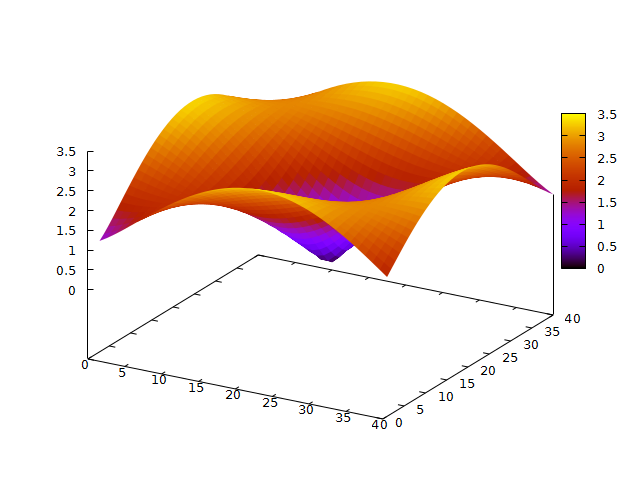

1

In [1]:
function k(x,y,z)
    (x+y+z)*a;
end

function Dynmatr(ax, ay, az)
    a11 = p/m * ( 6 - exp(2im*pi*k(ax,ay,az)) - exp(2im*pi*k(-ax,-ay,-az)) - exp(2im*pi*k(ax,-ay,-az)) -
     exp(2im*pi*k(-ax,ay,az)) - exp(2im*pi*k(ax,-ay,az)) - exp(2im*pi*k(-ax,ay,-az))  );
    #a11 = p/m * ( 6 - exp(2im*pi*k(ax,0,0)) - exp(2im*pi*k(-ax,0,0)) - exp(2im*pi*k(0,-ay,0)) -
    #  exp(2im*pi*k(0,ay,0)) - exp(2im*pi*k(0,0,az)) - exp(2im*pi*k(0,0,-az))  );
    
    a33 = a22 = a11;
    D = [a11 0 0;
        0 a22 0;
        0 0 a33];
end

a = 1; #4.95e-10;
p = 1; #4e-24;
m = 1; #34.53e-26;

X = linspace(-1//8*pi,1//8*pi,40);
Z = Y = X;
R = X*sqrt(2);
N = length(X);
OmX = zeros(N);
OmK = zeros(N);
OmL = zeros(N);
D = ev = zeros(3);
ev1 = zeros(N, N);
ev2 = zeros(N, N);
ev3 = zeros(N, N);

for i in eachindex(X)
    for j in eachindex(Y)
        D = Dynmatr(X[i], Y[j], Z[N >> 1]); # N >> 1 <=> N/2
        ev = eigvals(D); # eigenvalues
        ev1[i,j] = sqrt( abs(ev[1]) );
        ev2[i,j] = sqrt( abs(ev[2]) );
        ev3[i,j] = sqrt( abs(ev[3]) );
    end
end

using Gaston

surf(ev2,plotstyle="pm3d")

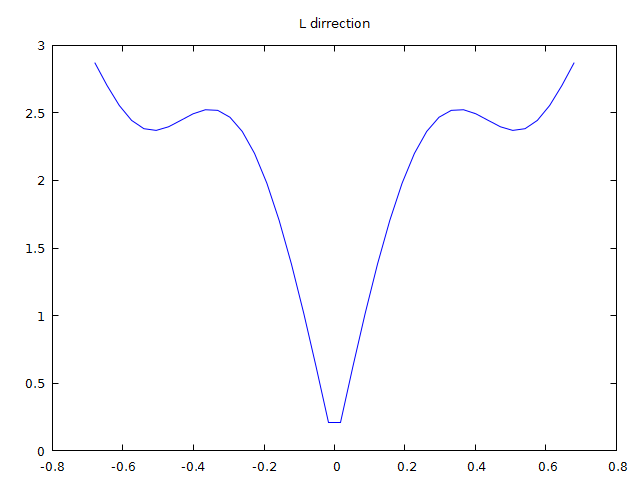

1

In [4]:
# направление L по диагонали куба
for i in eachindex(X)
    D = Dynmatr(X[i], Y[i], Z[i]);
    ev = eigvals(D); # eigenvalues
    OmL[i] = sqrt( abs(ev[1]) );
end

plot(X*sqrt(3), OmL,title = "L dirrection")

Резулятатом является трекратно-вырожденная акустическая ветвь. Варьируя параметры решетки попробуйте добиться её расщипления.